In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Height-Weight Data.xlsx') #read excel file and load to dataframe

In [3]:
df.head() #Return the first `n` rows.

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape #dimension of the DataFrame

(3501, 2)

Text(0.5, 1.0, 'Height vs Weight table')

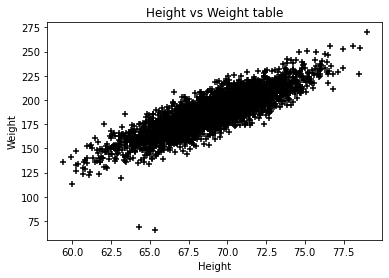

In [5]:
plt.scatter(df.Height , df.Weight, color='black', marker='+')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight table')

In [6]:
x = df.drop('Weight', axis=1)
y = df[['Weight']] #assign x = Height and y = Weight

In [7]:
x.head() #assign x = Height Return the first `n` rows.

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head()  #assign y = Weight Return the first `n` rows.

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
x.shape #dimension of Height column

(3501, 1)

In [10]:
y.shape #dimension of Weight column

(3501, 1)

In [11]:
x.mean() #mean of Height column

Height    69.024411
dtype: float64

In [12]:
y.mean() #mean of Weight column

Weight    186.891258
dtype: float64

# Seperate

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) #testing data=25%

In [14]:
xtrain.shape #dimension of 75% height data from dataframe for training
ytrain.shape #dimension of 75% Weight data from dataframe for training

(2625, 1)

In [15]:
xtest.shape #dimension of 25% height data from dataframe for testing
ytest.shape #dimension of 25% Weight data from dataframe for testing

(876, 1)

In [16]:
xtrain.head() #75% height data first `n` rows..

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [17]:
ytrain.head() #75% Weight data first `n` rows..

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [18]:
xtest.head() #75% Height data first `n` rows..

,Height
1269,72.165757
118,67.738963
2810,71.359472
2621,68.074623
1535,66.854111


In [19]:
ytest.head() #75% Weight data first `n` rows..

,Weight
1269,204.577436
118,178.170556
2810,197.472656
2621,171.695510
1535,180.544377


# Linear Regression

In [20]:
lr = LinearRegression() #object

In [21]:
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [22]:
m = lr.coef_
m

array([[5.96613032]])

In [23]:
c = lr.intercept_
c

array([-224.98706384])

In [24]:
yp = (m*68.78190405)+c
yp

array([[185.37473954]])

In [25]:
lr.predict([[68.78190405]])

array([[185.37473954]])

In [26]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


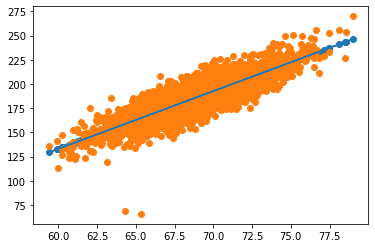

In [27]:
plt.plot(x.squeeze(), df['predicted_Weight'])  
plt.scatter(x, df[['predicted_Weight']])
plt.scatter(x, df[['Weight']])

In [28]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [29]:
mae #Mean Absolute Error 

8.145588569833935

In [30]:
mse #Mean Squared Error

103.70875574105969

In [31]:
lr.score(xtest, ytest)

0.7400625947962998

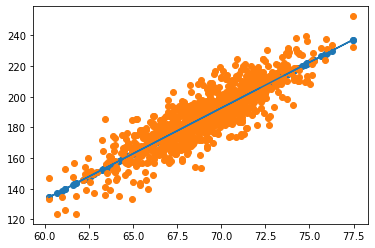

In [32]:
plt.plot(xtest.squeeze(), lr.predict(xtest))      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(xtest, lr.predict(xtest))
plt.scatter(xtest, ytest)

In [33]:
lr.predict([[71.7309784]])

array([[202.96930144]])

In [34]:
lr.predict([[80]])

array([[252.30336194]])

# save ai model

In [35]:
import pickle

In [36]:
pickle.dump(lr,open('shihab_lr1','wb'))

In [37]:
reg = pickle.load(open('shihab_lr1','rb'))

In [38]:
reg.predict([[71.7309784]])

array([[202.96930144]])